# Laser Basic Tests

## Objective

Evaluate the JRT BB2X Laser Distance Sensor's suitability for the project by testing its ability to measure various distances under different lighting conditions and comparing its results with the TOF sensor.

## Experiment Details

### Experiment Setup

- **Sensor Positioning**: At regular 0.5m intervals ranging from 0.5m to 5.0m, with the sensor directed at a wall.
- **Test Environments**: Indoors and outdoors.
- **Data Collection**: Each test generated approximately 500 distance measurement points.

### Data Extraction

- **Indoors**: Utilized the software provided by the sensor's manufacturer and copied into text files.
- **Outdoors**: Employed a Raspberry Pi and custom Python code to save the data into a text file. 

## Data Strucutre and Cleanup

- **File Organization**: Each distance interval (e.g., 0.5m, 1.0m, etc.) stores its measurements in a separate file located in their respective folders.
- **Default Software**: The software's format for each measurement comes in the form of a protocol of bytes:

    ```text
    [2023-07-31 15:00:47.787 R]AA 00 00 22 00 03 00 00 02 14 01 1C 58
    ```

- I filter out the date and extract the distance from the bytes following the [documentation](../references/Laser%20Sensor%20Documentation.pdf).
- **Raspberry Pi**: Every measurement from the Raspberry Pi includes time, distance and signal strength:

    ```text
    09:48:30 1030 659
    ```

- I keep the distances and filter out time and signal strength.

## Sensor Specification

The sensor claims precision up to 1mm for 100m, but its reliability can decrease with intense light exposure, similar to the TOF sensor.

## Code Setup

### Imports

To maintain a clean and organized notebook, various functionalities have been distributed into separate Python modules:

- [`processing.py`](../src/data/processing.py) includes data processing functions.
- [`loader.py`](../src/data/loader.py) aids in extracting sensor data from text files.
- [`basic_graphs.py`](../src/graphing/basic_graphs.py) provides utilities for data visualization.

In [13]:
import pathlib
import sys

import matplotlib.pyplot as plt
import pandas as pd

sys.path.append("../src")

from data import processing
from data.loader import FolderData
from graphing import basic_graphs

### Data Preparation and Loading

I define the list of actual distances measured and load the data files.

In [14]:
ACTUAL_DISTANCES = [0.5 * i for i in range(1, 11)]

LASER_INDOORS_DATA_PATH = pathlib.Path("../data/processed/laser_basic_tests/indoors/")
LASER_OUTDOORS_DATA_PATH = pathlib.Path("../data/processed/laser_basic_tests/outdoors/")
TOF_INDOORS_DATA_PATH = pathlib.Path("../data/processed/tof_basic_tests/indoors/")
TOF_OUTDOORS_DATA_PATH = pathlib.Path("../data/processed/tof_basic_tests/outdoors")

laser_indoors_data = FolderData(LASER_INDOORS_DATA_PATH)
laser_outdoors_data = FolderData(LASER_OUTDOORS_DATA_PATH)
tof_indoors_data = FolderData(TOF_INDOORS_DATA_PATH)
tof_outdoors_data = FolderData(TOF_OUTDOORS_DATA_PATH)

## Data Analysis

### Accuracy Assessment

- **Objective**: The sensor's accuracy is evaluated by comparing the mean measured distance to the actual distance at each interval.
- **Explanation**: Accuracy in our tests refers to how close our measurements are to the true values.
- **Analysis**: From the table below, we can see that the mean distance measured by the sensor at each interval, under both indoor and outdoor conditions, are nearly identical to that of the actual distance.

In [15]:
laser_indoors_mean = processing.get_mean(laser_indoors_data.distances)
laser_outdoors_mean = processing.get_mean(laser_outdoors_data.distances)
tof_indoors_mean = processing.get_mean(tof_indoors_data.distances)
tof_outdoors_mean = processing.get_mean(tof_outdoors_data.distances)

data = {
    "Actual Distance": ACTUAL_DISTANCES,
    "Indoors Mean": laser_indoors_mean,
    "Outdoors Mean": laser_outdoors_mean
}

df = pd.DataFrame(data)
display(df.T)

,0,1,2,3,4,5,6,7,8,9
Actual Distance,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
Indoors Mean,0.53,1.03,1.51,2.02,2.53,3.02,3.51,4.02,4.55,5.01
Outdoors Mean,0.50,1.03,1.51,2.01,2.50,3.00,3.50,3.96,4.45,4.96


Visual representation suggests that the laser maintains accuracy across indoor and outdoor settings, a feat the TOF sensor doesn't replicate. In both indoor and outdoor environments, the laser's graph follows exactly that of the actual distance. In contrast, the TOF sensor loses accuracy at around 4.0m and 3.0m for indoor and outdoor graphs respectively, as seen by the downward curves. Therefore, both the table and graphs show that the laser sensor appears to be accurate in indoor and outdoor conditions.

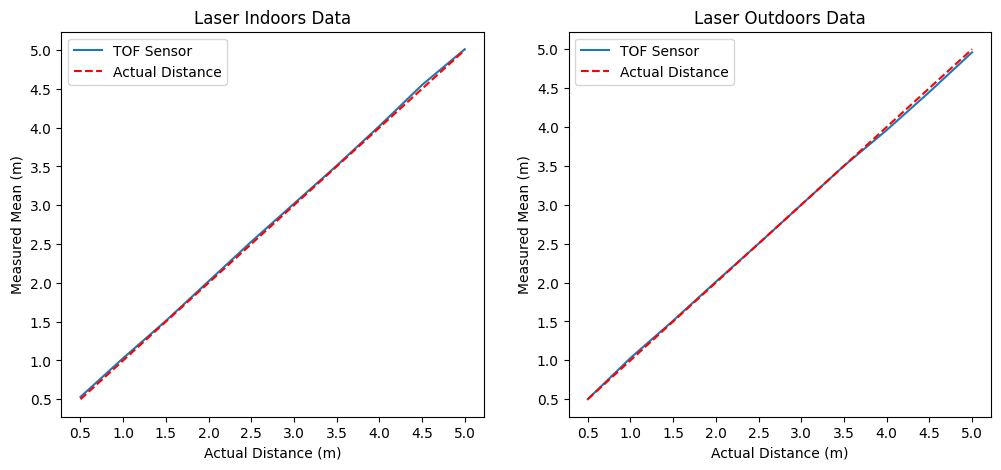

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_mean_vs_actual_distance(axes[0], laser_indoors_mean, "Laser Indoors Data")
basic_graphs.plot_mean_vs_actual_distance(axes[1], laser_outdoors_mean, "Laser Outdoors Data")

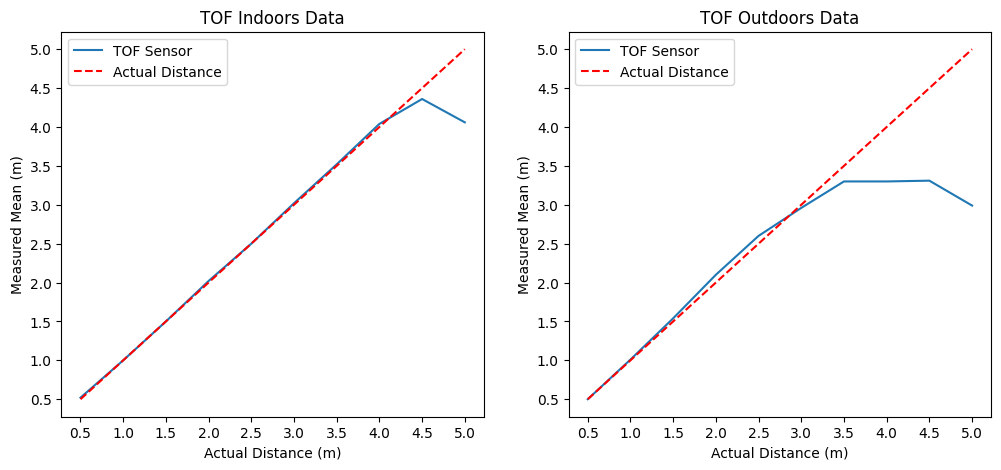

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_mean_vs_actual_distance(axes[0], tof_indoors_mean, "TOF Indoors Data")
basic_graphs.plot_mean_vs_actual_distance(axes[1], tof_outdoors_mean, "TOF Outdoors Data")

### Precision Assessment

- **Objective**: The sensor's precision is evaluated by plotting a scatter plot of the raw data and analyzing the spread of the points.
- **Explanation**: Precision in our tests refers to how close our measurements are to each other.
- **Analysis**: By analyzing the raw data through scatter plots, we deduce that the laser sensor is significantly more precise than the TOF sensor in both indoor and outdoor settings. The laser sensor for both indoor and outdoor environments show very precise measurements as seen by how the points are very closely clustered. In constrast, the TOF sensor is not very precise as depicted from the large spread of points as the distance intervals increase.

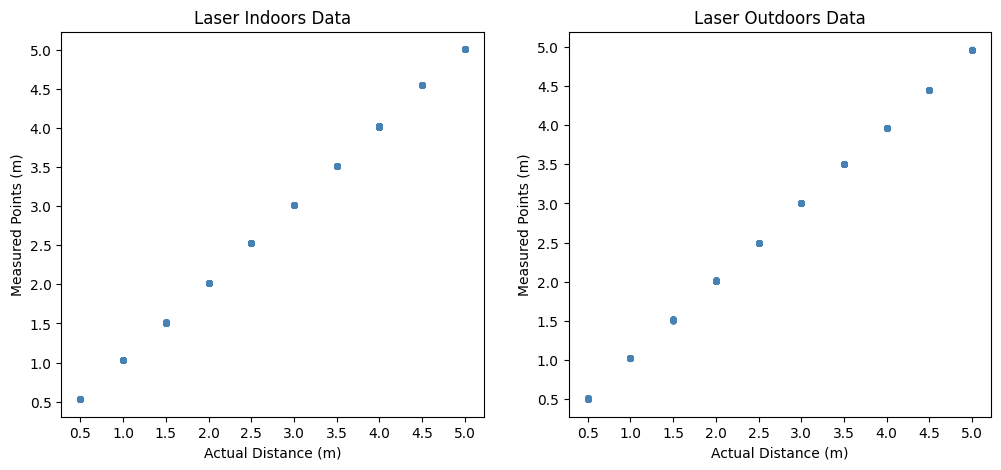

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_scatter(axes[0], laser_indoors_data.distances, "Laser Indoors Data")
basic_graphs.plot_scatter(axes[1], laser_outdoors_data.distances, "Laser Outdoors Data")

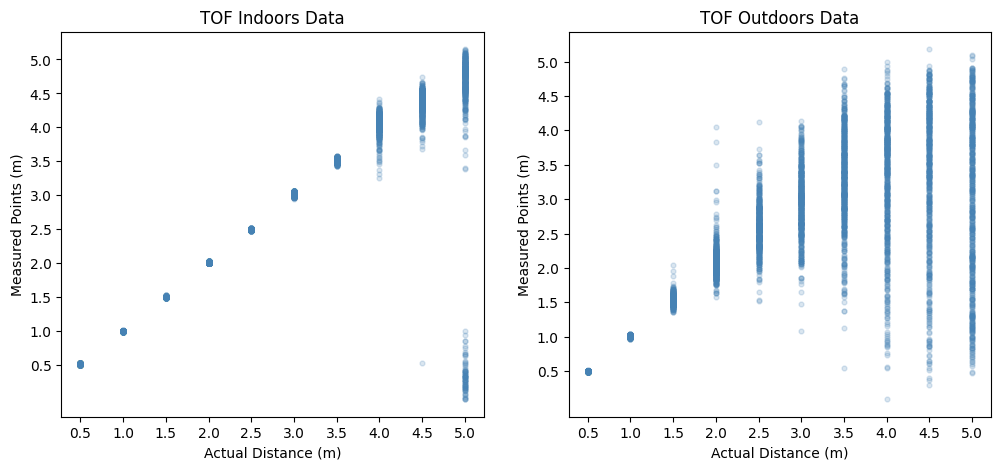

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_scatter(axes[0], tof_indoors_data.distances, "TOF Indoors Data")
basic_graphs.plot_scatter(axes[1], tof_outdoors_data.distances, "TOF Outdoors Data")

### Reliability Assessment: Standard Deviation

- **Objective**: Visualize the consistency of the laser sensor compared to the TOF sensor in each environment via standard deviation.
- **Explanation**: The standard deviation provides a measure of the spread of our measurements. In our context, a smaller standard deviation indicates that our measurements are tightly packed around the average value, hinting at both accuracy and precision.
- **Analysis**: The laser sensor exhibited such small standard deviations that they were hardly noticeable on the graphs. This tight spread reiterates its reliability in capturing consistent measurements. On the other hand, the TOF's pronounced standard deviation, particularly outdoors, reiterates concerns about its reliability. 

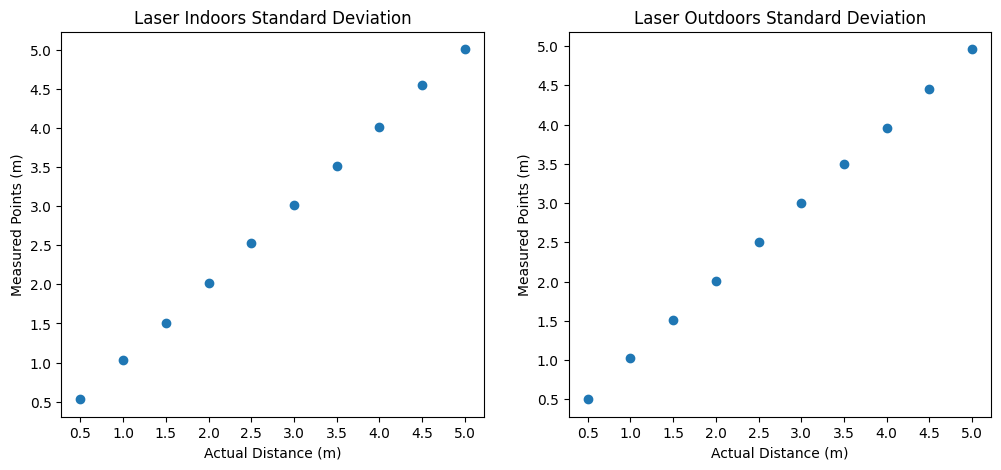

In [20]:
laser_indoors_std = processing.get_std(laser_indoors_data.distances)
laser_outdoors_std = processing.get_std(laser_outdoors_data.distances)
tof_indoors_std = processing.get_std(tof_indoors_data.distances)
tof_outdoors_std = processing.get_std(tof_outdoors_data.distances)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_std_errorbar(axes[0], laser_indoors_mean, laser_indoors_std, "Laser Indoors Standard Deviation")
basic_graphs.plot_std_errorbar(axes[1], laser_outdoors_mean, laser_outdoors_std, "Laser Outdoors Standard Deviation")

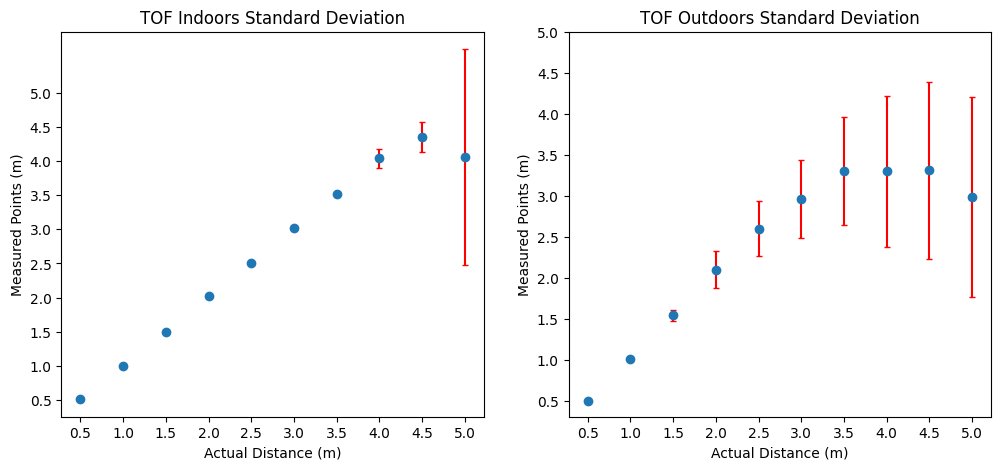

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_std_errorbar(axes[0], tof_indoors_mean, tof_indoors_std, "TOF Indoors Standard Deviation")
basic_graphs.plot_std_errorbar(axes[1], tof_outdoors_mean, tof_outdoors_std, "TOF Outdoors Standard Deviation")

### Reliability Assessment: Best Fit Line

- **Objective**: Compare the line of best fit for each dataset to gauge the sensor's reliability.
- **Explanation**: The best fit line provides a visual representation of the correlation between measured values and actual values. A slope close to 1 implies a direct, proportional relationship.
- **Analysis**: The laser sensor's best fit line almost mirrors the equation $y = x$, which is a testament to its robustness. Regardless of the test environment it offers consistent performance. On the other hand, the TOF sensor's deviation from this ideal line, especially outdoors, with an equation of $y = 0.62x + 0.62$ indicates that it is not as reliable as the laser sensor.

TypeError: 'Axes' object is not subscriptable

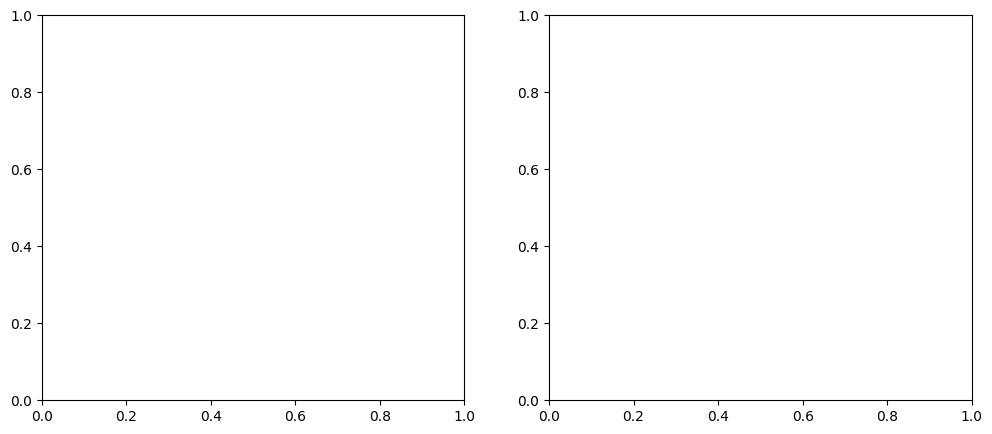

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_best_fit_scatter(axes[0], laser_indoors_data.distances, "Laser Indoors Raw")
basic_graphs.plot_best_fit_scatter(axes[1], laser_outdoors_data.distances, "Laser Outdoors Raw")

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
basic_graphs.plot_best_fit_scatter(axes[0], tof_indoors_data.distances, "TOF Indoors Raw")
basic_graphs.plot_best_fit_scatter(axes[1], tof_outdoors_data.distances, "TOF Outdoors Raw")

## Conclusion

Throughout our analysis, my findings highlight the Laser sensor's superior performance in both indoor and outdoor settings:

1. **Accuracy**: The Laser sensor consistently provided measurements that aligned very closely with actual distances, showcasing its reliability. In contrast, the TOF sensor struggled, particularly outdoors, displaying a variance from the true values that can be problematic in reliably detecting pass vehicles.
2. **Precision**: Precision tests further bolstered the Laser sensor's credentials. It demonstrated a tight cluster of measurements around the true values, ensuring repeatability and trustworthiness in its readings. The TOF sensor, on the other hand, displayed significant scatter, indicating potential inconsistencies in its readings.
3. **Standard Deviation**: A minimal spread in the Laser sensor's measurements affirmed its consistency, while the TOF sensor's larger standard deviation, especially outdoors, raised concerns about its reliability and susceptibility to external interferences.
4. **Best Fit Line**: The near-perfect $y=x$ best-fit line for the Laser sensor underpins its reliable and consistent behavior across test conditions. The TOF sensor's deviation from this ideal relationship, especially in outdoor settings, suggests its readings can be unpredictable under variable environmental conditions.

Given these findings, the laser sensor is preferred over the TOF sensor to measure the passing distances of vehicles to cylists, given that the sensor will be operating in a dynamic environment exposed to bright daylight, where accuracy and precision is key.